In [1]:
import network_design as nd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np

In [2]:
def colors(X):
    color = []
    for i in range(len(X)):
        if np.where(X[i] == 1)[0][0] == 0:
            color.append('r')
        elif np.where(X[i] == 1)[0][0] == 2:
            color.append('gold')
        else:
            color.append('deepskyblue')
    return color

# Fig 1

In [3]:
# Create capacities
edge_capacities = {0:{0:(1),1:(1)},1:{0:(1),1:(0),2:(0,1)}}


In [4]:
X = np.zeros((5,2))
X[:3,0] = 1
X[3:,1] = 1
cur_capacities = nd.create_edge_capacities(edge_capacities,X)

In [5]:
networks = []
caps = []
count = {}
for i in range(1000):
    g,cap = nd.link_soup(X,nd.create_edge_capacities(edge_capacities,X),ret_cap=True)
    found = False
    for i,n in enumerate(networks):
        if nx.is_isomorphic(g,n):
            count[i] += 1
            found = True
            break
    if not found:
        count[len(networks)] = 1
        networks.append(g)
        caps.append(cap)
        
        

In [6]:
count

{0: 92, 1: 209, 2: 46, 3: 475, 4: 162, 5: 16}

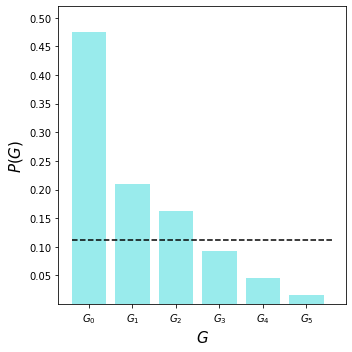

In [7]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(6),np.sort(np.array(list(count.values())))[::-1]/sum(list(count.values())),align='edge',color='darkturquoise',alpha=.4)
plt.xticks(np.array([.4,1.4,2.4,3.4,4.4,5.4]),[f'$G_{i}$' for i in range(6)])
plt.hlines(1/9,0,6,linestyles='--',color='k')
plt.yticks(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5]))
plt.ylim(0,.52)
plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.tight_layout()
plt.savefig('figs/drafts/v3/fig2/microcanonical_dist.pdf')
plt.show()

In [8]:
idx = np.argsort(np.array(list(count.values())))[::-1]

/tmp/ipykernel_27764/3512027678.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


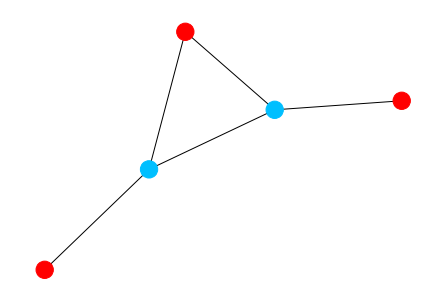

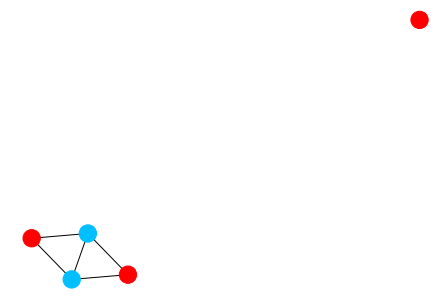

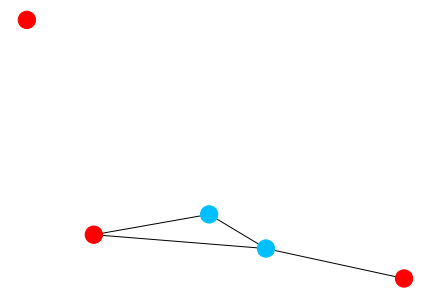

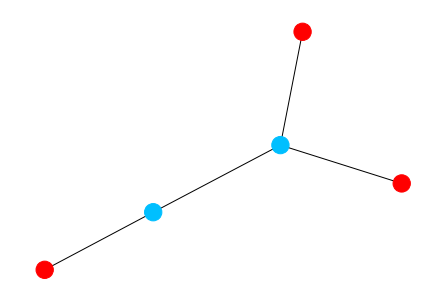

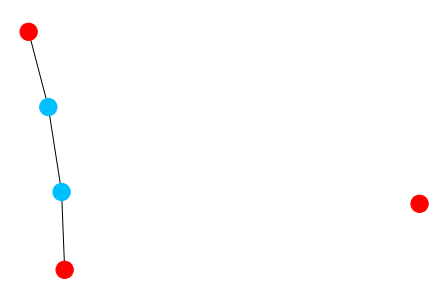

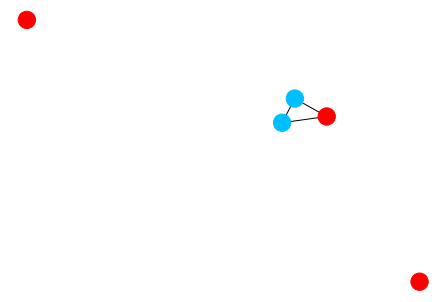

In [9]:
for i in idx:
    nx.draw(networks[i],node_color=colors(X))
    plt.savefig(f'figs/drafts/v3/fig2/network_{i}.pdf')
    plt.tight_layout()
    plt.show()

In [10]:
O = np.array([[0,2],[8/5,7/5]])

In [11]:
networks = []
caps = []
count = {}
for i in range(10000):
    g = nd.canonical_ensemble(X.sum(axis=0).astype(int),O,X)
    found = False
    for i,n in enumerate(networks):
        if nx.is_isomorphic(g,n):
            count[i] += 1
            found = True
            break
    if not found:
        count[len(networks)] = 1
        networks.append(g)
        # caps.append(cap)

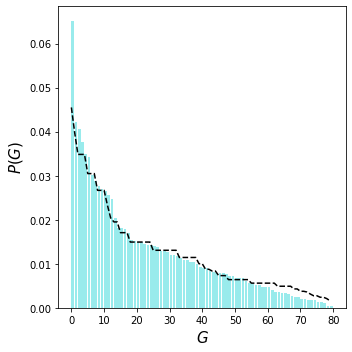

In [24]:
plt.figure(figsize=(5,5))
plt.bar(np.arange(len(count.keys())),np.sort(np.array(list(count.values())))[::-1]/sum(list(count.values())),align='edge',color='darkturquoise',alpha=.4)
plt.plot(np.arange(len(count.keys())),sorted(p,reverse=True),'--',color='k')
# plt.xticks(np.array([.4,1.4,2.4,3.4,4.4,5.4]),[f'$G_{i}$' for i in range(6)])
# plt.hlines(1/9,0,6,linestyles='--',color='k')
# plt.yticks(np.array([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5]))
# plt.ylim(0,.52)
plt.xlabel('$G$',fontsize=15)
plt.ylabel('$P(G)$',fontsize=15)
plt.tight_layout()
plt.savefig('figs/drafts/v3/fig2/canonical_dist.pdf')
plt.show()

In [17]:
idx = np.argsort(np.array(list(count.values())))[::-1]

In [22]:
p = np.array([nd.probability(nx.adjacency_matrix(networks[k]).toarray(),X.sum(axis=0).astype(int),O,X) for k in idx])
p /= p.sum()

In [233]:
P = np.zeros((5,5))
N_vec = X.sum(axis=0).astype(int)
for i in range(5):
    for j in range(i,5):
        # Get labels of nodes
        theta_i = np.where(X[i]==1)[0][0]
        theta_j = np.where(X[j]==1)[0][0]
        if i ==4 and j ==4:
            print(O[theta_i,theta_j]/N_vec[theta_j],O[theta_j,theta_i]/N_vec[theta_i])
        P[i,j] = np.min([1,np.min([O[theta_i,theta_j]/N_vec[theta_j],O[theta_j,theta_i]/N_vec[theta_i]])])

0.7 0.7


In [21]:
np.sum(np.sort(np.array(list(count.values())))[::-1]/sum(list(count.values())))

np.float64(0.9999999999999999)

In [234]:
A = nx.adjacency_matrix(networks[0]).toarray()

In [238]:
[P[i,j]**(A[i,j])*(1-P[i,j])**(1-A[i,j]) for i in range(0,A.shape[0]) for j in range(i,A.shape[0])]

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.5333333333333333),
 np.float64(0.5333333333333333),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.4666666666666667),
 np.float64(0.5333333333333333),
 np.float64(1.0),
 np.float64(0.5333333333333333),
 np.float64(0.4666666666666667),
 np.float64(0.30000000000000004),
 np.float64(0.7),
 np.float64(0.30000000000000004)]

In [236]:
probs = []
for i in range(A.shape[0]):
    for j in range(i,A.shape[0]):
        probs.append(P[i,j]**(A[i,j]) * (1- P[i,j])**(1-A[i,j]))

In [237]:
probs

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.5333333333333333),
 np.float64(0.5333333333333333),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.4666666666666667),
 np.float64(0.5333333333333333),
 np.float64(1.0),
 np.float64(0.5333333333333333),
 np.float64(0.4666666666666667),
 np.float64(0.30000000000000004),
 np.float64(0.7),
 np.float64(0.30000000000000004)]

In [232]:
A

array([[0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0]])

In [219]:
2/2,1.6/3

(1.0, 0.5333333333333333)